# Librería matplotlib

(basado en https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Matplotlib es un paquete python para la generación de gráficos.
Permite obtener resultados de calidad de forma rápida en gran variedad de formatos.

La idea de este breve repaso a matplotlib es tratar de comprender su funcionamiento básico.
Entender los cambios que podemos realizar sobre los diferentes elementos para poder entender y modificar ejemplos más complejos.

Antes de empezar es buena idea echar un vistazo a la galería http://matplotlib.org/gallery.html para ver las posibilidades que nos ofrece.

## Primera gráfica

Matplotlib posee un montón de módulos que pueden resultar confusos al principio.
La forma más recomendable de empezar es centrarse en el módulo ``pyplot``.

El módulo ``pyplot`` es el encargado de juntar toda la potencia de matplotlib. Se trata del punto de partida para:

* Preparar las figuras
* Pintar las gráficas
* Hacer modificaciones sobre las gráficas

Con este módulo, cada función que invoquemos realizará un cambio sobre la figura: pintar una línea, añadir una etiqueta, cambiar los límites de un eje,...

Las funciones que pintan los gráficos en general utilizarán un array de numpy o un objeto similar como entrada. Las series y dataframes de pandas suelen funcionar (aunque no para todas las funciones). En todo caso se pueden convertir a un array de numpy antes de plotearlos.

Importamos los módulos que utilizaremos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Un ejemplo muy sencillo que podemos realizar con matplotlib es el siguiente:

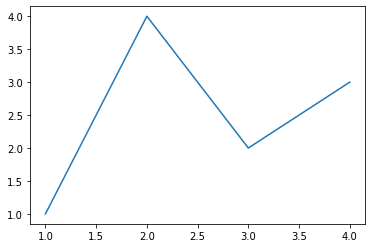

In [10]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.show()

Simplemente hemos especificado las coordenadas x e y de los puntos que queremos conectar con líneas utilizando dos listas y todo lo demás ha funcionado solo.

Matplotlib ha realizado una serie de acciones por defecto como crear la figura (lienzo),
crear una gráfica en el lienzo, asignar valores al eje X, etc.

Podemos especificar estas coordenadas como una función:

In [40]:
x = np.linspace(0,15,30)
y = np.sin(x)

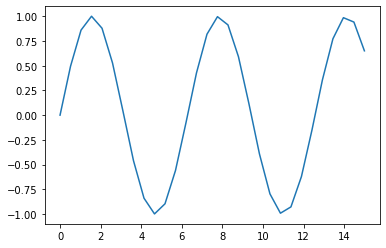

In [13]:
plt.plot(x,y)

## Partes de una figura

En una figura podemos encontrar una gran variedad de objetos diferentes que la componen:

![](_images/anatomia_figura.png)

El pintado se realiza a través del objeto  `Figure` (http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure).
Se puede ver como el lienzo donde vamos a pintar nuestra/s gráfica/s. Es aquí donde especificaremos cosas como el tamaño, la resolución en dpi o su aspect ratio.

Cada ``Figure`` puede contener uno o varios ``Axes``: 

![](_images/matplotlib_2.png)

Un ``Axes`` es lo que identificamos como una gráfica. Puede ser una línea, un histograma, etc. A través de este objeto podemos acceder y modificar la apariencia, los ejes, etiquetas, título, leyenda, etc, por medio de distintos métodos.

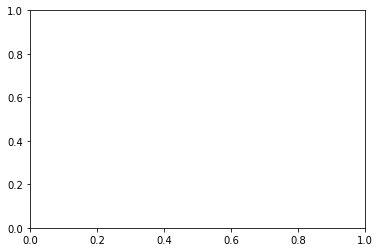

In [3]:
fig = plt.figure()    # creamos un objeto Figure
ax = plt.subplot()    # cremos un objeto Axes

O, en una sola línea:

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))  # aquí damos el tamaño de la figura

## Explícito o implícito

Hay dos formas diferentes de pintar una misma gráfica:

In [48]:
x = np.linspace(0, 2, 100)

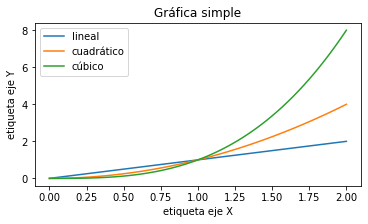

In [49]:
# Método implícito

plt.figure(figsize=(5, 3), layout='constrained')

plt.plot(x, x, label='lineal')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='cuadrático')  # etc.
plt.plot(x, x**3, label='cúbico')

plt.xlabel('etiqueta eje X')
plt.ylabel('etiqueta eje Y')
plt.title("Gráfica simple")
plt.legend()

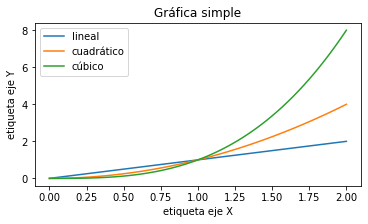

In [50]:
# Método explícito

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')

ax.plot(x, x, label='lineal')  # Plot some data on the axes.
ax.plot(x, x**2, label='cuadrático')  # Plot more data on the axes...
ax.plot(x, x**3, label='cúbico')  # ... and some more.

ax.set_xlabel('etiqueta eje X')  # Add an x-label to the axes.
ax.set_ylabel('etiqueta eje Y')  # Add a y-label to the axes.
ax.set_title("Gráfica simple")  # Add a title to the axes.
ax.legend()  # Add a legend.

El primer ejemplo, el método implícito, parece más claro y sencillo. Lo que está ocurriendo es que todos los métodos del objeto ``Axes`` están disponibles directamente desde ``pyplot``.
Así pues cuando ejecutamos ``plt.plot()``, ``pyplot`` llama internamente a ``ax.plot()``. Esto da un nivel extra de sencillez pero reduce en parte la versatilidad.  
En cambio en el segundo ejemplo se usa el método explícito, llamando directamente a un  objeto ``Axes``.

Conclusión: para ejemplos sencillos y rápidos podemos recurrir a la versión "abreviada" o implícita, más fácil de usar. Pero cuando queramos realizar gráficas más elaboradas es recomendable utilizar la versión explícita, que nos da más control sobre los diferentes elementos individuales.

Cuando copiemos código de los ejemplos nos encontraremos en este segundo caso. Con objeto de poder entender y reutilizar dicho código, en el resto de este tutorial usaremos la forma explícita.

## Estilos

Usaremos ``plot`` para dibujar una línea. Podemos modificar el estilo cambiando el estilo de línea, su grosor o su color, por ejemplo. Esto se puede hacer con argumentos de la función plot:

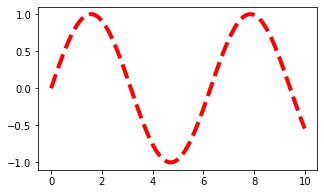

In [32]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.sin(x), linestyle='--', linewidth=4, color='red')
# Esto es idéntico, usando RGB:
#ax.plot(x, np.sin(x), linestyle='--', linewidth=4, color=(1.0, 0.0, 0.0))

Hay mucha más información sobre colores en https://matplotlib.org/stable/gallery/color/index.html y https://matplotlib.org/stable/tutorials/colors/colors.html

Además de líneas, hay otros muchos gráficos que se pueden utilizar en matplotlib.
Por ejemplo, aquí representamos algunos datos de estaciones extraídos de la web de ONAMET (Oficina Nacional Meteorológica de la República Dominicana) por medio de marcadores (markers) en forma de rombos, gracias al método ``ax.scatter``:

In [14]:
df = pd.read_csv("../07_pandas/onamet_20230824.csv", sep=",", skiprows=4, encoding = "utf-8")
df =df[4:10] # Nos quedamos con seis filas para simplificar
df

NÚM.         ESTACIÓN               PROVINCIA  \
4   5.0  ARPT. DEL CIBAO                SANTIAGO   
5   6.0   ARPT. EL CATEY                  SAMANÁ   
6   7.0       ENRIQUILLO                BARAHONA   
7   8.0          CABRERA  MARÍA TRINIDAD SÁNCHEZ   
8   9.0       VILLA RIVA                  DUARTE   
9  10.0          LA VEGA                 LA VEGA   

                         LOCALIDAD  TIPO T. MÁX. (°C) T. MÍN. (°C)  \
4                           ONAMET  EMCO         35.0         23.0   
5                           ONAMET  EMCO         33.0         24.6   
6        MINISTERIO DE AGRICULTURA  EMCV         31.5         25.0   
7  ESCUELA ARÍSTIDES FIALLO CABRAL  EMCO         32.5         25.0   
8   HOSP. MPAL. ALICIA DE LEGENDRE  EMCO         32.0         23.0   
9                           IATESA  EMCO         30.5         24.0   

   LLUVIA (mm)  
4         20.0  
5         19.3  
6         17.3  
7         14.3  
8         11.9  
9         10.7

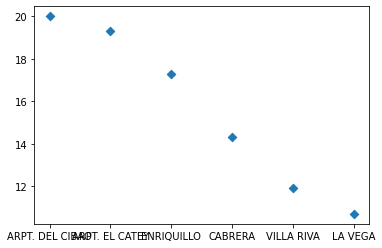

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["ESTACIÓN"], df["LLUVIA (mm)"], marker="D")
plt.show()

O quizás mejor, usando un diagrama de barras (``ax.bar``):

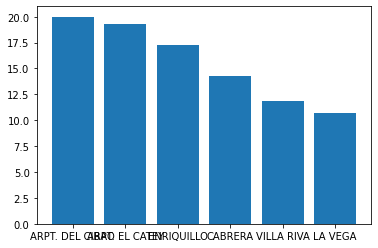

In [4]:
fig, ax = plt.subplots()
ax.bar(df["ESTACIÓN"], df["LLUVIA (mm)"])
plt.show()

Se puede modificar también el estilo de dibujo. Por ejemplo para usar el estilo seaborn:

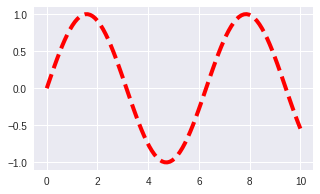

In [3]:
plt.style.use(['seaborn'])
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.sin(x), linestyle='--', linewidth=4, color='red')

seaborn tiene además su propia librería: https://seaborn.pydata.org/

## Límites

Matplotlib se encarga de por sí solo de establecer los límites de las gráficas. Sin embargo en muchas ocasiones podemos querer controlar este aspecto. Lo haremos mediante los métodos ``ax.set_ylim`` y ``ax.set_ylim``:

(-2.0, 2.0)

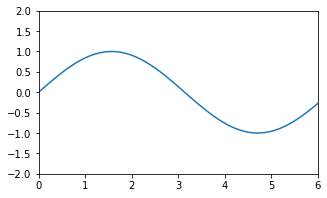

In [5]:
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.sin(x))
ax.set_xlim(0, 6)
ax.set_ylim(-2, 2)

Podemos establecer únicamente el límite inferior o superior y dejar que matplotlib se encargue del resto:

(-1.0993384025373631, 2.0)

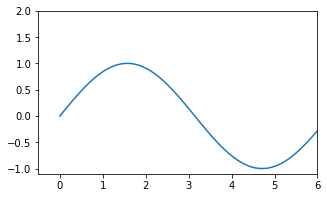

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.sin(x))
ax.set_xlim(right=6)
ax.set_ylim(top=2)

## Marcas (ticks) y etiquetas

Matplotlib nos da también métodos para dar título de la gráfica (``ax.set_title``), a las etiquetas de los ejes (``ax.set_xlabel`` y ``ax.set_ylabel``), y a la frecuencia de las marcas y sus etiquetas (``ax.xticks`` y ``ax.yticks``). 
Alternativamente se puede usar el objeto axis, con la función ``ax.axis.set_ticks``.

Si los incluímos en el diagrama de barras del apartado anterior:

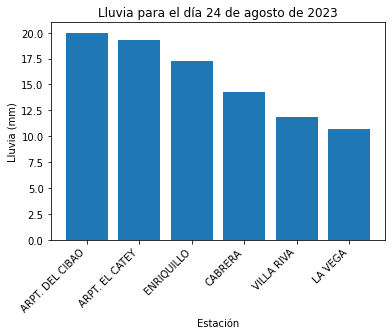

In [19]:
fig, ax = plt.subplots()
ax.bar(df["ESTACIÓN"], df["LLUVIA (mm)"])
ax.set_ylabel('Lluvia (mm)')
ax.set_xlabel('Estación')
ax.set_xticks(range(0, len(df["ESTACIÓN"])), df["ESTACIÓN"], rotation=45, ha="right") 
# o también:
# ax.xaxis.set_ticks(range(0, len(df["ESTACIÓN"])), df["ESTACIÓN"], rotation=45, ha="right") 
ax.set_title("Lluvia para el día 24 de agosto de 2023")
plt.show()

En el caso de las etiquetas de las marcas (los "ticks") observar que el primer argumento indica la posición de cada marca, y el segundo el texto de cada etiqueta:

In [9]:
list(range(0, len(df["ESTACIÓN"])))  #  Las barras están en las posiciones 0 a 5

[0, 1, 2, 3, 4, 5]

In [10]:
df["ESTACIÓN"]

4    ARPT. DEL CIBAO
5     ARPT. EL CATEY
6         ENRIQUILLO
7            CABRERA
8         VILLA RIVA
9            LA VEGA
Name: ESTACIÓN, dtype: object

Además hemos girado las etiquetas para evitar que se pisen unas a otras (argumento opcional rotation), y las hemos desplazado a la derecha (argumento opcional ha) para que estén bien situadas bajo su marca.

Hay una gran variedad de formatos de ticks posibles (por ejemplo se pueden dibujar ticks mayores y menores).  
En la documentación se puede encontrar una explicación más detallada (por ejemplo, para usar fechas como etiquetas se puede consultar https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html).

### Expresiones matemáticas

Matplotlib puede utilizar el lenguaje de markup TeX para escribir expresiones matemáticas (en el título, una etiqueta, la leyenda, etc).
Para ello basta con poner la expresión en código TeX dentro de signos de dólar($).

In [9]:
# Por ejemplo, la expresión de TeX $e^{i\pi}+1=0$ queda así:

$\Large e^{i\pi}+1=0$

Veamos un caso práctico en el que tomamos datos de una semana de la estación de Atlacomulco de la web del Servicio Meteorológico Nacional de México:

In [21]:
df = pd.read_csv("Estacion_ATLACOMULCO_1_semana.csv", parse_dates=[0], skiprows=9,
                     sep=",", encoding = "ISO-8859-1", index_col=[0])
df = df.sort_index()

Si queremos representar la radiación, que tiene como unidad watios por metro cuadrado, podemos incluir el símbolo del cuadrado fácilmente con TeX:

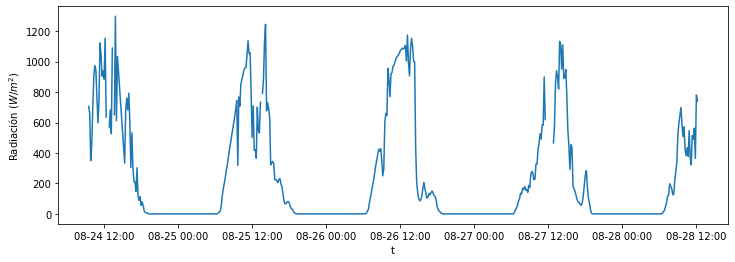

In [14]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df.index, df['Radiación Solar (W/m2)'])
ax.set_ylabel('Radiación ($W/m^2$)') # Con los $, escribe el cuadrado correctamente
ax.set_xlabel('t')
myFmt = mdates.DateFormatter('%m-%d %H:%M')  # Un ejemplo de formateo de fechas para los xticks
ax.xaxis.set_major_formatter(myFmt)

## Leyenda

El método ``ax.legend`` nos da la opción de incluir una leyenda. Hay distintos argumentos para modificar el contenido de la leyenda y su posición en el gráfico (poniéndola incluso fuera de él).  
Usando el ejemplo anterior:

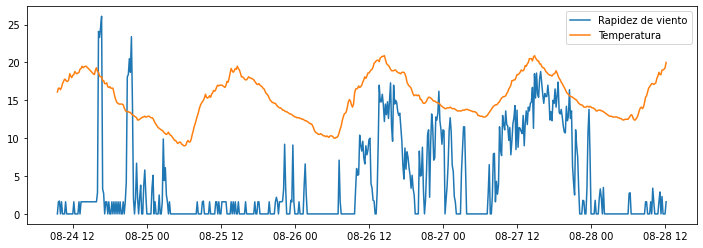

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df.index, df['Rapidez de viento (km/h)'], label='Rapidez de viento')
ax.plot(df.index, df['Temperatura del Aire (°C)'], label='Temperatura')
ax.legend()
plt.show()

## Anotaciones

Para añadir una anotación sobre la propia gráfica se puede utilizar ``ax.annotate``:

/tmp/ipykernel_81964/1569395812.py:8: RuntimeWarning: invalid value encountered in sqrt
  eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
/tmp/ipykernel_81964/1569395812.py:9: RuntimeWarning: invalid value encountered in sqrt
  eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
/tmp/ipykernel_81964/1569395812.py:10: RuntimeWarning: invalid value encountered in sqrt
  eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
/tmp/ipykernel_81964/1569395812.py:11: RuntimeWarning: invalid value encountered in sqrt
  eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
/tmp/ipykernel_81964/1569395812.py:12: RuntimeWarning: invalid value encountered in sqrt
  eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
/tmp/ipykernel_81964/1569395812.py:13: RuntimeWarning: invalid value encountered in sqrt
  eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)

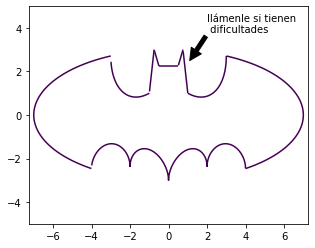

In [6]:
import matplotlib.pyplot as plt
from numpy import sqrt, meshgrid, arange

xs = arange(-7.25, 7.25, 0.01)
ys = arange(-5, 5, 0.01)
x, y = meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)

fig, ax = plt.subplots(figsize=(5, 4))

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    ax.contour(x, y, f, [0])

ax.annotate('llámenle si tienen\n dificultades', xy=(1.1, 2.5), xytext=(2, 3.8),
            arrowprops=dict(facecolor='black'), fontsize=10)

plt.show()

## Compartiendo ejes

Volviendo al ejemplo de la estación de Atlacomulco, no parece adecuado representar la temperatura y la rapidez del viento en el mismo eje, dado que tienen escalas distintas.

Podemos construir una gráfica con dos ``Axes`` diferentes, uno para cada parámetro, pero que compartan el eje X. Para ello usaremos ``ax.twinx``:

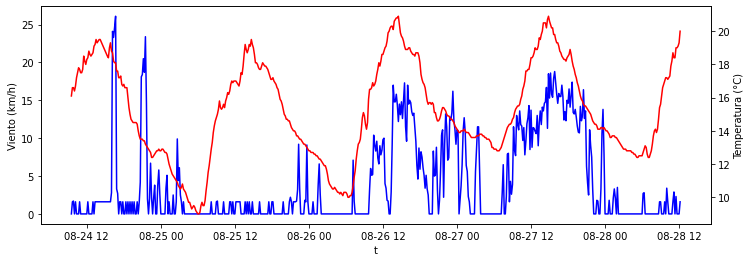

In [33]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df.index, df['Rapidez de viento (km/h)'], color=(0,0,1))
ax2 = ax1.twinx()
ax2.plot(df.index, df['Temperatura del Aire (°C)'], color=(1,0,0))
ax1.set_ylabel("Viento (km/h)")
ax2.set_ylabel("Temperatura (°C)")
ax1.set_xlabel("t")
plt.show()

**Ejercicio:** Utilizar el fichero de Buenos Aires (buenos_aires_20230813.txt) para representar en una misma gráfica la temperatura y la humedad relativa, compartiendo el eje X (eje de tiempo). Incluir una leyenda con los dos parámetros.

In [3]:
df = pd.read_csv("../07_pandas/buenos_aires_20230813.txt", parse_dates=[['Fecha', 'Hora']],
                     sep=",", encoding = "ISO-8859-1", usecols=[0,1,3,5], index_col=[0])
df = df.sort_index()

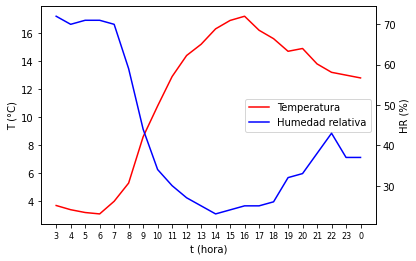

In [7]:
fig, ax1 = plt.subplots()
lns1 = ax1.plot(df.index, df["T (°C)"], color="red", label="Temperatura")
ax2 = ax1.twinx() # utilizamos el mismo eje x para las 2 gráficas
lns2 = ax2.plot(df.index, df["HR (%)"], color="blue", label="Humedad relativa")
ax1.set_xlabel('t (hora)')
ax1.set_ylabel("T (°C)")
ax2.set_ylabel("HR (%)")

ax1.set_xticks(ticks=df.index, labels=df.index.hour, fontsize=8)

labels = [l.get_label() for l in lns1+lns2]
ax1.legend(lns1+lns2, labels, loc='center right')
plt.show()

## Subplots

Cada ``Figure`` puede contener varios ``Axes``, se conocen como subaxes o subplots.

Cuando añadimos una gráfica a la figura podemos especificar cuantas filas y columnas queremos, y que posición ocupa la gráfica actual, con los argumentos de subplot(ncol, nrow, n).

Hay varias maneras de añadir y modificar gráficas en una figura. Veamos las más comunes:

In [ ]:
fig, axes = plt.subplots(1, 3)   # devuelve una Figure y una 3-tupla de Axes
    ...

ax = plt.subplot(2, 2, 1)        # divide la figura en 4 partes y devuelve el primer axes

ax = fig.add_subplot(2, 2, 1)    # equivalente al anterior

ax = fig.add_axes([.6, .6, .2, .2]) # añade un Axe con la geometria [left, bottom, width, height]

Veamos un ejemplo de dibujo de subplots con el fichero de Atlacomulco:

In [43]:
df = pd.read_csv("Estacion_ATLACOMULCO_1_semana.csv", parse_dates=[0], skiprows=9,
                     sep=",", encoding = "ISO-8859-1", index_col=[0])
df = df.sort_index()

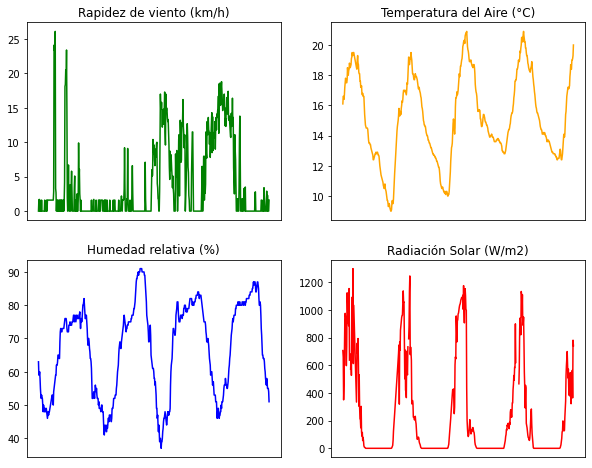

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))   # devuelve una Figure y un array de Axes
parameter = [["Rapidez de viento (km/h)","Temperatura del Aire (°C)"],
             ["Humedad relativa (%)", "Radiación Solar (W/m2)"]]
parcolors = [["green", "orange"], ["blue", "red"]]

for i in [0,1]:
    for j in [0,1]:
        axes[i,j].plot(df[parameter[i][j]], color=parcolors[i][j])
        axes[i,j].set_title(parameter[i][j])
        axes[i,j].set_xticks([])  # quito las etiquetas del eje X para que no molesten

Otras instrucciones útiles: ``plt.subplots_adjust`` nos permite jugar con el espaciado entre gráficas. 
Si tenemos problemas con el ajuste de espacios podemos usar ``plt.tight_layout``, que realiza un auto ajuste.

## Guardar en fichero

Podemos guardar la figura por medio de ``fig.savefig``, indicando el nombre y la extensión:

In [ ]:
fig.savefig('atlacomulco.png')
fig.savefig('atlacomulco.pdf')
fig.savefig('atlacomulco.ps')

## Mapas de color

Es posible que a veces queramos una gráfica con una tercera dimensión representada por colores diferentes en un mapa de colores. Matplotlib dispone de varias funciones (``ax.pcolormesh``, ``ax.contourf``, ``ax.imshow``) para conseguir esto.

Por ejemplo, supongamos que queremos representar la radiación solar dependiendo del día del mes (en el eje Y) y de la hora del día (en el eje X), de forma que cada color represente una diferente insolación, desde una radiación nula en color azul oscuro a una radiación máxima en color amarillo.
Este código nos da la respuesta:

In [2]:
parameter = 'Radiación Solar (W/m2)'

In [3]:
df = pd.read_csv("Estacion_ATLACOMULCO_1_semana.csv", parse_dates=[0], skiprows=9,
                     sep=",", encoding = "ISO-8859-1", index_col=[0])
df = df.sort_index()

df = df[[parameter]]     # Nos quedamos con el parametro elegido
df['dia'] = df.index.date
df['hora'] = df.index.hour
df_hour = df[df.index.minute==0]  # Eliminamos las observaciones que no son a la hora en punto

In [9]:
df_rad = pd.pivot_table(df_hour, values='Radiación Solar (W/m2)', 
                        index='dia', columns='hora')
df_rad

hora         0    1    2    3    4    5    6     7      8      9   ...  \
dia                                                                ...   
2023-08-24  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN    NaN  ...   
2023-08-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  57.0  331.0  596.0  ...   
2023-08-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  72.0  310.0  355.0  ...   
2023-08-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  56.0  159.0  173.0  ...   
2023-08-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  49.0  167.0  522.0  ...   

hora            14     15     16     17     18   19   20   21   22   23  
dia                                                                      
2023-08-24   612.0    NaN  793.0  210.0   56.0  6.0  0.0  0.0  0.0  0.0  
2023-08-25  1132.0  321.0  218.0  129.0   75.0  3.0  0.0  0.0  0.0  0.0  
2023-08-26  1102.0   99.0  165.0  142.0   45.0  0.0  0.0  0.0  0.0  0.0  
2023-08-27  1112.0  777.0  181.0   74.0  256.0  5.0  0.0  0.0  0.0  0.0  
2023-08-28     NaN    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 24 columns]

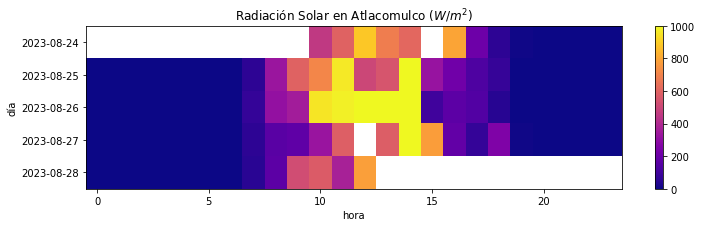

In [11]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12,3))
pc = ax.imshow(df_rad, cmap='plasma', aspect='auto',
               norm=mpl.colors.Normalize(vmin=0, vmax=1000))
ax.set_yticks(range(0, len(df_rad.index)),df_rad.index)
ax.set_xlabel("hora")
ax.set_ylabel("día")
ax.set_title("Radiación Solar en Atlacomulco ($W/m^2$)")
fig.colorbar(pc)

**Warning:** notar que en este caso hemos cometido un error, al tomar la observación de la hora en punto como representativa de toda la hora.

Dado que tenemos observaciones cada 10 minutos, podemos afinar incluso más:

In [16]:
import matplotlib.dates as mdates

In [12]:
df['minuto'] = df.index.minute
df_rad_min = pd.pivot_table(df, values='Radiación Solar (W/m2)', 
               index='dia', columns=['hora', 'minuto'])

In [40]:
xtickvalues = df_rad_min.columns.get_level_values(0)

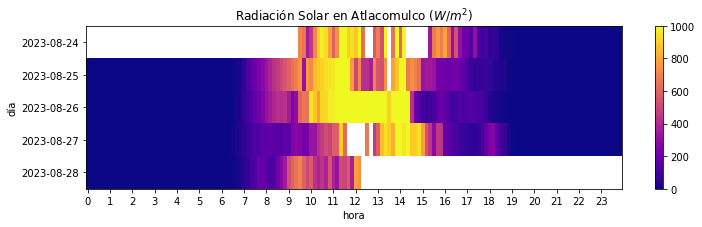

In [45]:
fig, ax = plt.subplots(figsize=(12,3))
pc = ax.imshow(df_rad_min, cmap='plasma', aspect='auto',
               norm=mpl.colors.Normalize(vmin=0, vmax=1000))
xFmt = mdates.DateFormatter('%H')
yFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xFmt)
ax.yaxis.set_major_formatter(yFmt)
xtickvalues = df_rad_min.columns.get_level_values(0) # Indice superior (horas) en el multiindice 
ax.set_xticks(range(0, len(xtickvalues),6),xtickvalues[range(0, len(xtickvalues),6)])
ax.set_yticks(range(0, len(df_rad_min.index)),df_rad_min.index)
ax.set_xlabel("hora")
ax.set_ylabel("día")
ax.set_title("Radiación Solar en Atlacomulco ($W/m^2$)")
fig.colorbar(pc)

## Consejos útiles

### ¿Qué formato de salida debo escoger?

Como diría un buen gallego, depende. Depende del gráfico que estemos generando, pero en general para empezar escoged PNG. Una breve explicación sobre formatos que puede aclarar algunas ideas:

* El formato GIF está limitado a 256 colores y es un formato de compresión sin pérdida de información, una elección habitual para su uso en la Web. GIF es una buena opción para guardar dibujos de líneas, texto o iconos con un tamaño de fichero pequeño.
* El formato PNG es también un formato de compresión sin pérdida de información, una elección habitual para su uso en la Web. PNG es una buena opción para guardar dibujos de líneas, texto o iconos con un tamaño de fichero pequeño.
* El formato JPG es un formato de compresión con pérdida de información. Esto lo hace útil para almacenar fotografías con un tamaño menor que un BMP. JPG es una opción habitual en la Web porque está comprimido. Para guardar dibujos de líneas, texto, e iconos con un tamaño de fichero menor GIF o PNG son mejores opciones porque no tienen pérdidas.

JPEGs son para fotografías e imágenes realistas. PNGs son para dibujos con líneas, imágenes con una gran cantidad de texto e imágenes con pocos colores. GIFs no sirven en general.

### Producción masiva: acelerando Matplotlib

Este consejo va más enfocado al dibujo de mapas, donde la generación de gráficos puede llevar bastante tiempo. Si tenemos que crear una gran cantidad de gráficos o mapas veremos que los procesos llevan bastante tiempo. Si dichos gráficos tienen características en común, por ejemplo el mapa de fondo (proyección, líneas de costa, colores, extensión) es adecuado reutilizar dicho trabajo para los gráficos siguientes.

Una opción es limpiar parte de la figura que hemos realizado en lugar de construirla de nuevo. De este modo únicamente cambiamos los datos sobre el gráfico de fondo ya creado.

Cabe también pensar en la serialización de objetos a través del módulo pickle, para ser reutilizados posteriormente.

En general, no solo para la generación de gráficos, lo primero es hacer que nuestro programa funcione, lo segundo es optimizarlo.

### Un último consejo

Matplotlib está muy bien, pero no nos obsesionemos  ;-)

![](_images/523_decline.png)